In [1]:
from display import *
from obspy import read,UTCDateTime
import pandas as pd
import matplotlib.dates as md
from geographiclib.geodesic import Geodesic

In [99]:
dir_summary='summaries'
tag='example'
wave_path = './data/BATS_SAC/2009/20090808/*YULB*SAC'

In [100]:
def dist_to_point(pd_ls_cata, center_lat, center_lon):
    dist = []
    for i in range(len(pd_ls_cata)):
        event_lat = pd_ls_cata.iloc[i].lat
        event_lon = pd_ls_cata.iloc[i].lon
        distance = Geodesic.WGS84.Inverse(center_lat, center_lon, event_lat, event_lon)['a12'] * 111
        dist.append(distance)
    pd_ls_cata["dist_to_sta"] = dist
    return pd_ls_cata

In [101]:
ls_catalog = 'Lins_catalog_landslides.dat'
pd_ls_catalog = pd.read_csv(ls_catalog)
pd_ls_catalog.time = [UTCDateTime(t.replace('/', '-')).datetime for t in pd_ls_catalog.time]
pd_ls_catalog.head()
pd_ls_catalog = pd_ls_catalog[(pd_ls_catalog.time >= UTCDateTime(2009,8,8,10,0).datetime) & (pd_ls_catalog.time <= UTCDateTime(2009,8,8,23,30).datetime)]
pd_ls_catalog = dist_to_point(pd_ls_catalog, 23.3924, 121.2971)

In [102]:
32/len(pd_ls_catalog)

0.7619047619047619

In [103]:
def make_cumus(event_times):
    x = event_times
    c = [1] * len(x)
    y = [sum(c[0:x:1]) for x in range(len(x)+1)]
    return x, y

/home/lchuang/projects/scatnet/display.py:95: H5pyDeprecationWarning:

dataset.value has been deprecated. Use dataset[()] instead.

/home/lchuang/projects/scatnet/display.py:96: H5pyDeprecationWarning:

dataset.value has been deprecated. Use dataset[()] instead.



[0 1 2]


(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative within-clusters detections'}, ylabel='Number of events'>)

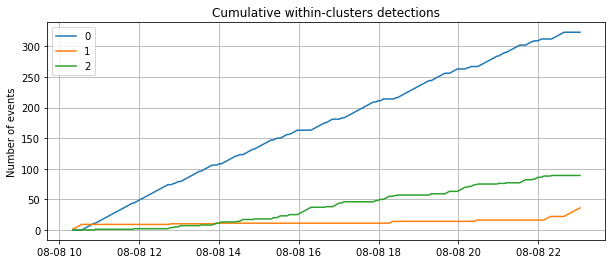

In [113]:
epoch = 5000
show_detections(dir_summary, tag, epoch=epoch, dir_output=None,save='detections_{:05d}.png', norm=None)

/home/lchuang/projects/scatnet/display.py:145: H5pyDeprecationWarning:

dataset.value has been deprecated. Use dataset[()] instead.

/home/lchuang/projects/scatnet/display.py:146: H5pyDeprecationWarning:

dataset.value has been deprecated. Use dataset[()] instead.

/home/lchuang/projects/scatnet/display.py:147: H5pyDeprecationWarning:

dataset.value has been deprecated. Use dataset[()] instead.



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Scattering latent space'}, xlabel='First latent variable', ylabel='Second latent variable'>)

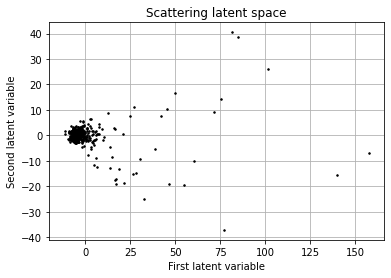

In [114]:
show_latent(dir_summary, tag, epoch=epoch, dir_output=None, save='latent.png')

In [115]:
def cluster_opt_to_pds(file_path):
    
    # ---- read in the h5py output file
    with h5py.File(file_path, 'r') as hf:
        time = hf['time'].value
        hot = hf['epoch_{:05d}'.format(epoch)]['hot'].value
    
    # ---- convert time format
    time_c = md.num2date(time)
    time_f = [UTCDateTime(t).datetime for t in time_c]
    
    # ---- conver them to a pd file
    pd_cluster = pd.DataFrame()
    pd_cluster["time"] = time_f
    pd_cluster["c_index"] = hot
    
    return pd_cluster

In [116]:
# Load cluster files
file_path = os.path.join(dir_summary, tag, 'clusters.h5')
pd_cluster = cluster_opt_to_pds(file_path)

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning:

dataset.value has been deprecated. Use dataset[()] instead.

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning:

dataset.value has been deprecated. Use dataset[()] instead.



In [117]:
from obspy.signal.tf_misfit import plot_tfr

def plot_spectrogram(file, b_time, etime, appd_secs):
    
    # ---- read wf
    tr=read(file,starttime=b_time-appd_secs,endtime=etime+65+appd_secs)
    tr=tr.detrend('demean')
    tr=tr.filter('highpass',freq=0.01)
    
    # ---- plot spectrum and spectrogram
    for i in range(len(tr)):
        plot_tfr(tr[i].data, dt=tr[i].stats.delta, fmin=0.01, 
        fmax=10, w0=8., nf=64, fft_zero_pad_fac=4)   

In [118]:
cluster_index=1
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()

,index,time,c_index
0,0,2009-08-08 10:20:00.019500,1
1,1,2009-08-08 10:21:42.419500,1
2,2,2009-08-08 10:23:24.819500,1
3,3,2009-08-08 10:25:07.219500,1
4,4,2009-08-08 10:26:49.619500,1


/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



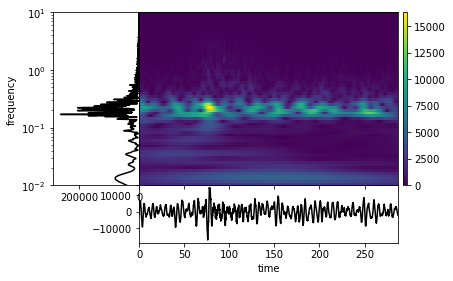

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



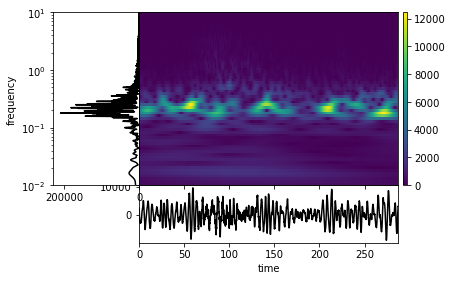

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



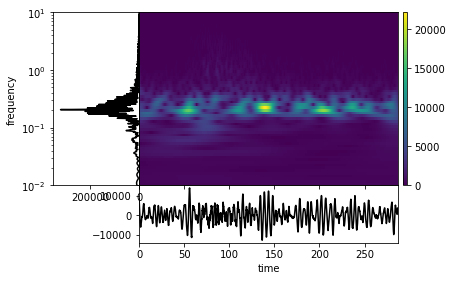

In [119]:
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[20].time)
e_time = UTCDateTime(spec_cluster.iloc[21].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

In [130]:
import plotly.graph_objs as go

# ---- plot Lin's catalog
lin_x, lin_y = make_cumus(pd_ls_catalog.time)
fig = go.Figure(data=[go.Scatter(x=lin_x,
                                 y=lin_y,
                                 marker=dict(
                                     size=pd_ls_catalog.mag**0.5*10,
                                     color=pd_ls_catalog.dist_to_sta,
                                     colorbar=dict(thickness=25,x=-0.15, len=0.8)
                                 ),
                                 text=pd_ls_catalog.dist_to_sta,
                                 mode='lines+markers',
                                 name='Lins')])
# ---- plot clusters
for i in pd.unique(pd_cluster.c_index):
    if i != -9:
        clst_x, clst_y = make_cumus(pd_cluster[pd_cluster.c_index==i].time)
        fig.add_traces(data=[go.Scatter(x=clst_x, y=clst_y, mode='lines+markers',name=f'clst#{i}')])
    
fig.update_xaxes(rangeslider_visible=True)
fig.show()

### Landslide classified as landslide (cluster 2)

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



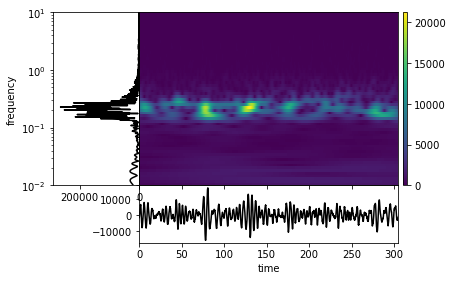

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



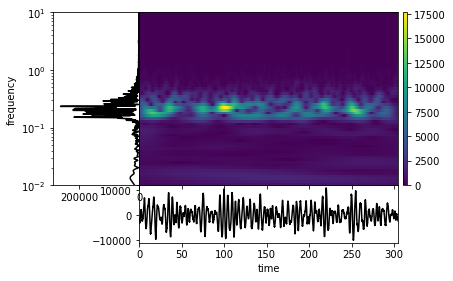

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



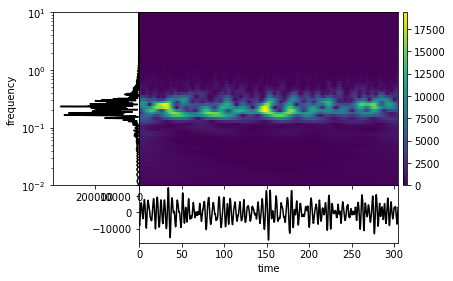

In [121]:
cluster_index=2
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[15].time)
e_time = UTCDateTime(spec_cluster.iloc[15].time)
appd_secs=120
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



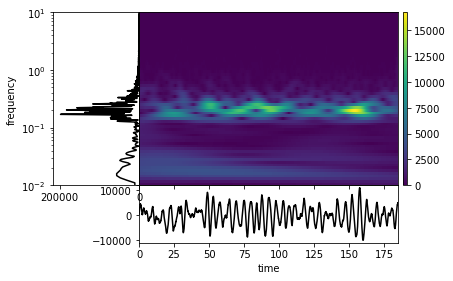

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



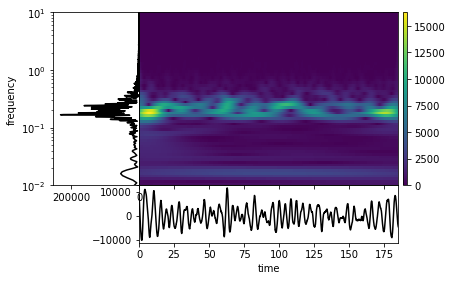

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



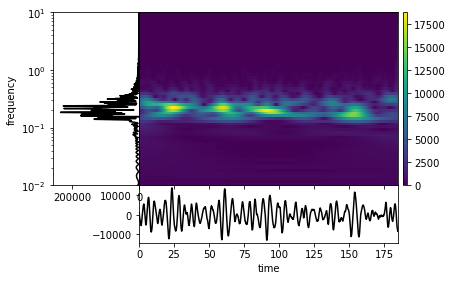

In [122]:
cluster_index=2
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[0].time)
e_time = UTCDateTime(spec_cluster.iloc[0].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



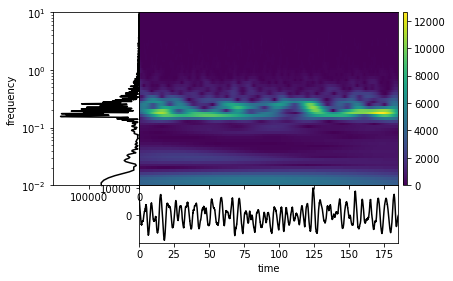

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



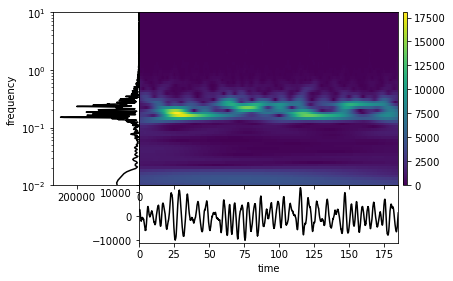

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



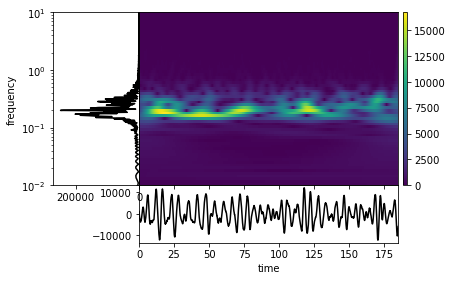

In [123]:
cluster_index=2
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[2].time)
e_time = UTCDateTime(spec_cluster.iloc[2].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

### classified as landslide (cluster 2) but not in Lin's catalog

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



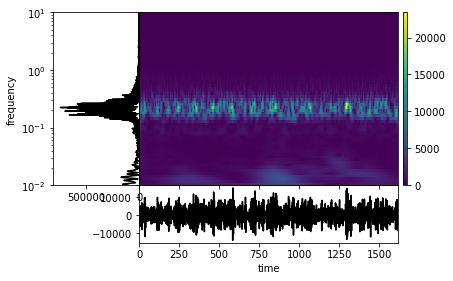

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



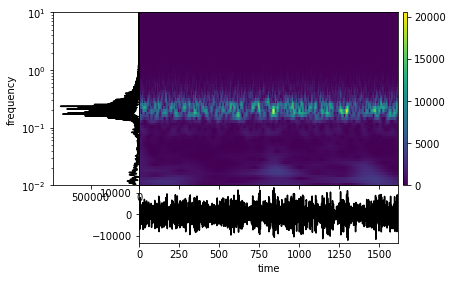

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



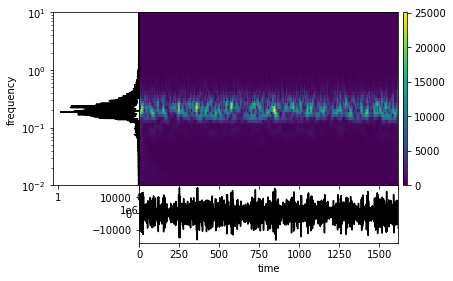

In [124]:
cluster_index=2
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[12].time)
e_time = UTCDateTime(spec_cluster.iloc[13].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs)  

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



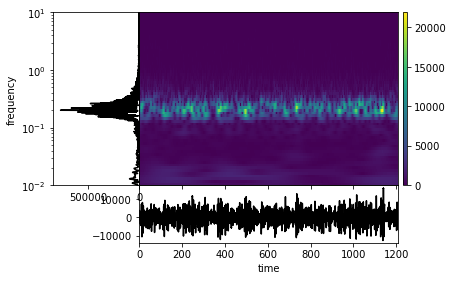

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



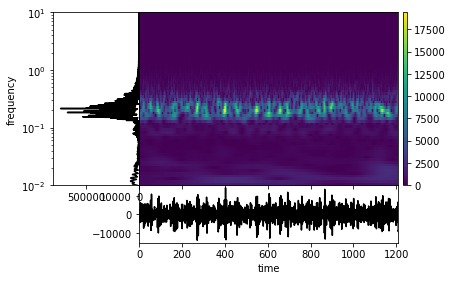

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



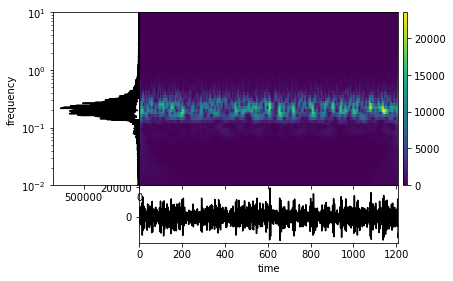

In [125]:
cluster_index=2
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[16].time)
e_time = UTCDateTime(spec_cluster.iloc[17].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

### Landslide classified as EQ 

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



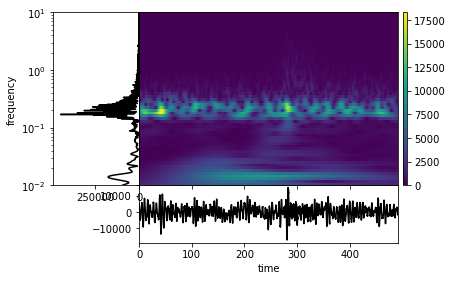

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



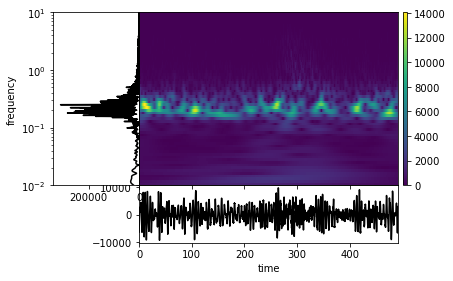

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



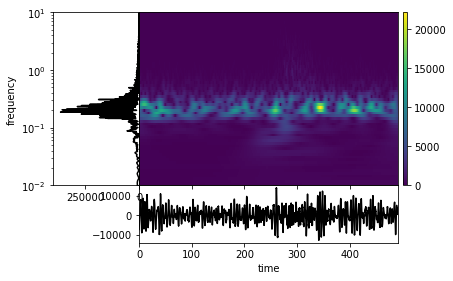

In [126]:
cluster_index=1
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[18].time)
e_time = UTCDateTime(spec_cluster.iloc[21].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



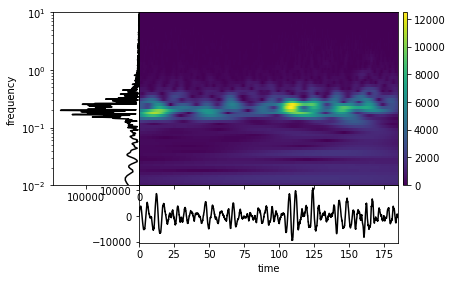

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



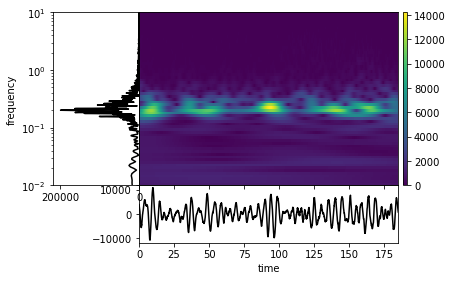

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



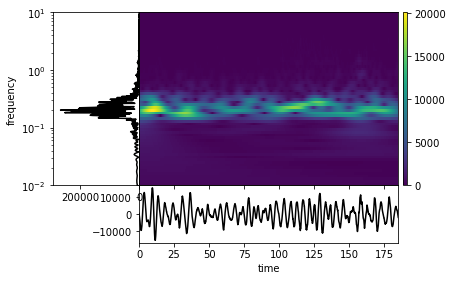

In [127]:
cluster_index=1
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[14].time)
e_time = UTCDateTime(spec_cluster.iloc[14].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



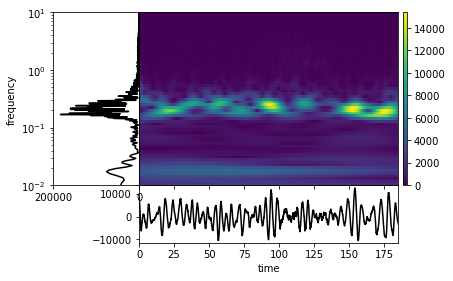

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



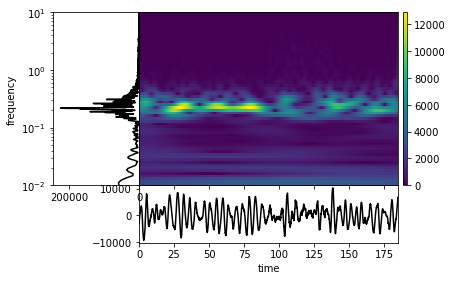

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



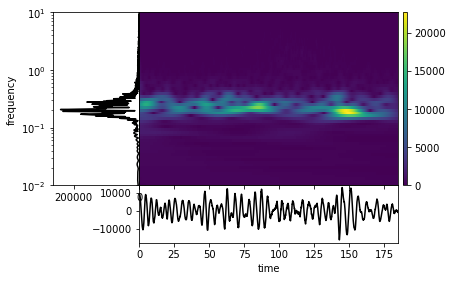

In [128]:
cluster_index=1
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[12].time)
e_time = UTCDateTime(spec_cluster.iloc[12].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 

### Earthquake classified as earthquake (cluster 1)

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



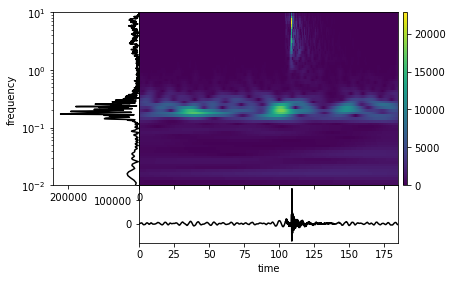

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



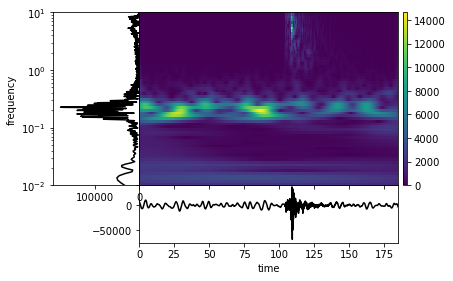

/home/lchuang/anaconda/envs/obspy/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:1501: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



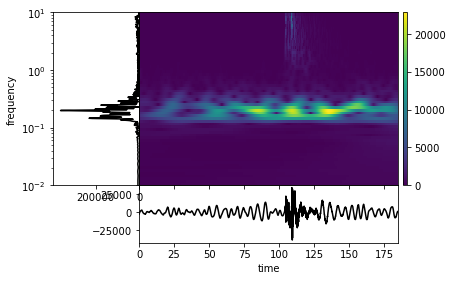

In [129]:
cluster_index=1
spec_cluster = pd_cluster[pd_cluster.c_index==cluster_index].reset_index()
spec_cluster.head()
wave_path = wave_path
b_time = UTCDateTime(spec_cluster.iloc[1].time)
e_time = UTCDateTime(spec_cluster.iloc[1].time)
appd_secs=60
plot_spectrogram(wave_path, b_time, e_time, appd_secs) 